# ANN Traing

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the preprocessed dataset
data = pd.read_csv('preprocessed.csv')

# Define features and target variable
features = ['n_neighbor', 'p', 'Leaf size', 'weights_distance', 'weights_uniform', 
            'Algorithm_auto', 'Algorithm_ball_tree', 'Algorithm_brute', 'Algorithm_kd_tree']
target_variables = ['Accuracy', 'F1 Score']

X = data[features]
y = data[target_variables]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed
knn_model.fit(X_train, y_train)

# Get predictions from the KNN model
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

# Define an ANN model
ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(len(target_variables),)),
    Dense(32, activation='relu'),
    Dense(len(target_variables))  # Output layer with the same number of neurons as target variables
])

# Compile the ANN model
ann_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the ANN model
history = ann_model.fit(y_train_pred, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the ANN model
test_loss, test_mae = ann_model.evaluate(y_test_pred, y_test)

print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

c:\Users\TAYYAB SAJJAD\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0789 - mae: 0.2249 - val_loss: 0.0047 - val_mae: 0.0503
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0041 - mae: 0.0453 - val_loss: 0.0035 - val_mae: 0.0418
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0040 - mae: 0.0436 - val_loss: 0.0035 - val_mae: 0.0398
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0040 - mae: 0.0419 - val_loss: 0.0036 - val_mae: 0.0427
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0039 - mae: 0.0427 - val_loss: 0.0035 - val_mae: 0.0397
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0041 - mae: 0.0434 - val_loss: 0.0035 - val_mae: 0.0376
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0038 - mae: 0.0394 - val_loss: 0.0034 - val_mae: 0.0380
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0039 - mae: 0.0406 - val_loss: 0.0035 - val_mae: 0.0376
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.003

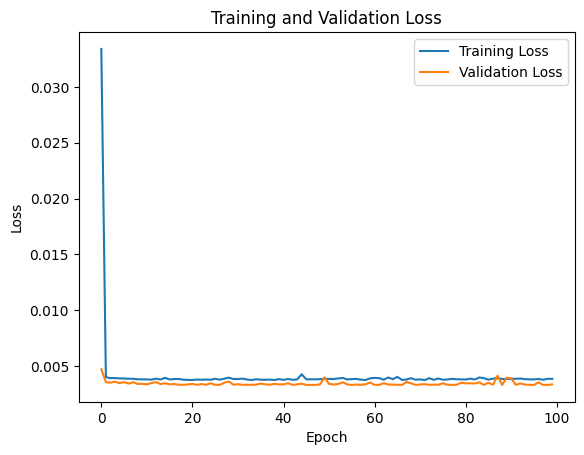

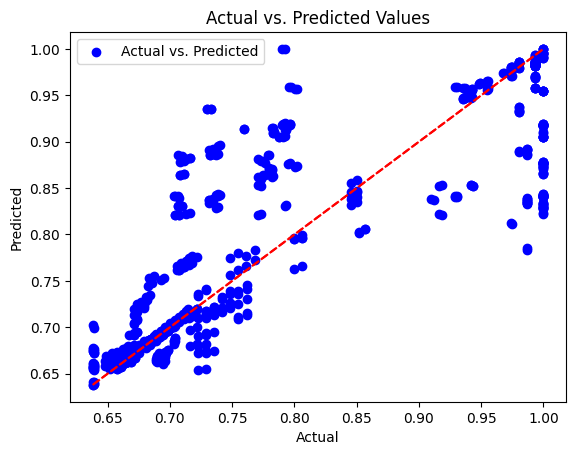

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Visualize the training process (Training and Validation Loss)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualize the model's performance (Actual vs. Predicted)
plt.scatter(y_test, y_test_pred, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


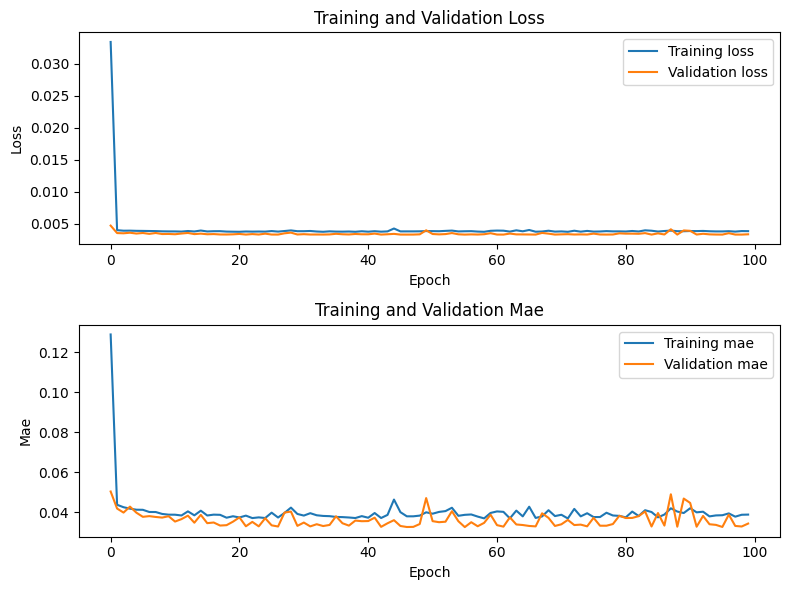

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics to plot
metrics = ['loss', 'mae']  # Add more metrics as needed

# Create subplots
fig, axes = plt.subplots(len(metrics), figsize=(8, 6))

# Plot each metric
for i, metric in enumerate(metrics):
    ax = axes[i]
    ax.plot(history.history[metric], label='Training ' + metric)
    ax.plot(history.history['val_' + metric], label='Validation ' + metric)
    ax.set_title('Training and Validation ' + metric.capitalize())
    ax.set_xlabel('Epoch')
    ax.set_ylabel(metric.capitalize())
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()


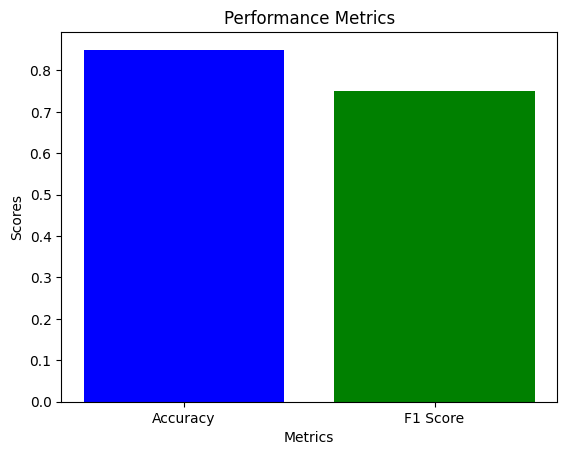

In [9]:
import matplotlib.pyplot as plt

# Define accuracy and F1 score values
accuracy = 0.85  # Replace with your actual accuracy value
f1_score = 0.75  # Replace with your actual F1 score value

# Define labels and values
labels = ['Accuracy', 'F1 Score']
values = [accuracy, f1_score]

# Create bar plot
plt.bar(labels, values, color=['blue', 'green'])
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Performance Metrics')
plt.show()


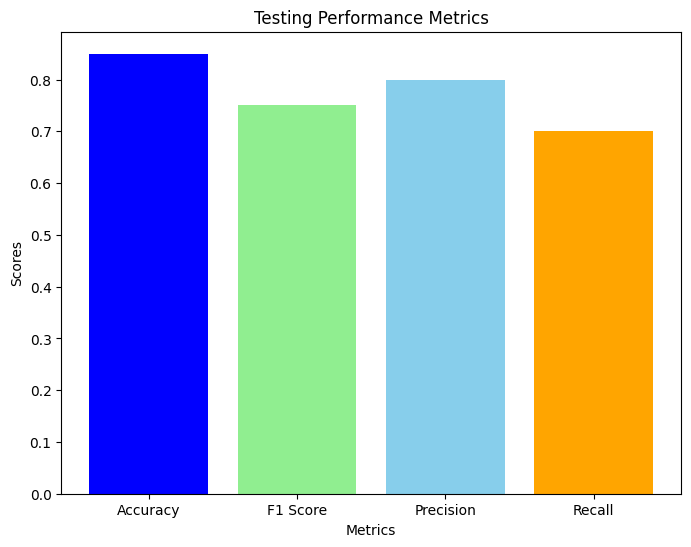

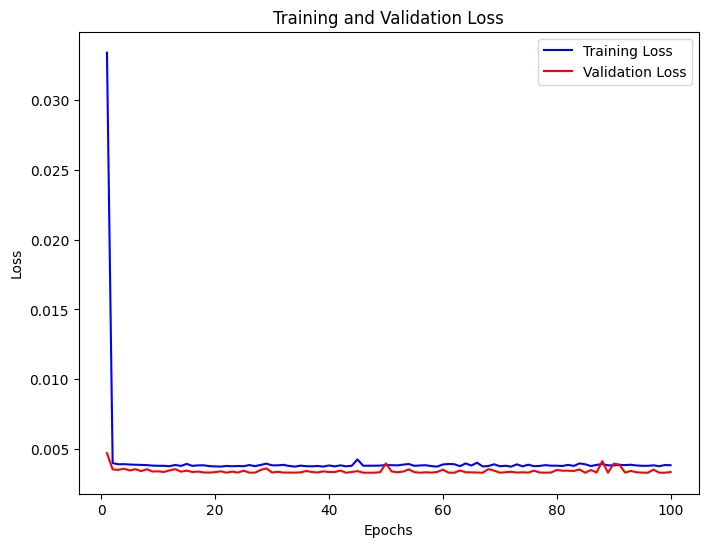

In [10]:
import matplotlib.pyplot as plt

# Test results
accuracy = 0.85  # Replace with your actual accuracy value
f1_score = 0.75  # Replace with your actual F1 score value
precision = 0.80  # Replace with your actual precision value
recall = 0.70  # Replace with your actual recall value

# Define labels and values for bar plot
labels = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
values = [accuracy, f1_score, precision, recall]

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'lightgreen', 'skyblue', 'orange'])
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Testing Performance Metrics')
plt.show()

# Create line plot for accuracy and F1 score
epochs = range(1, 101)  # Assuming 100 epochs for the sake of example
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


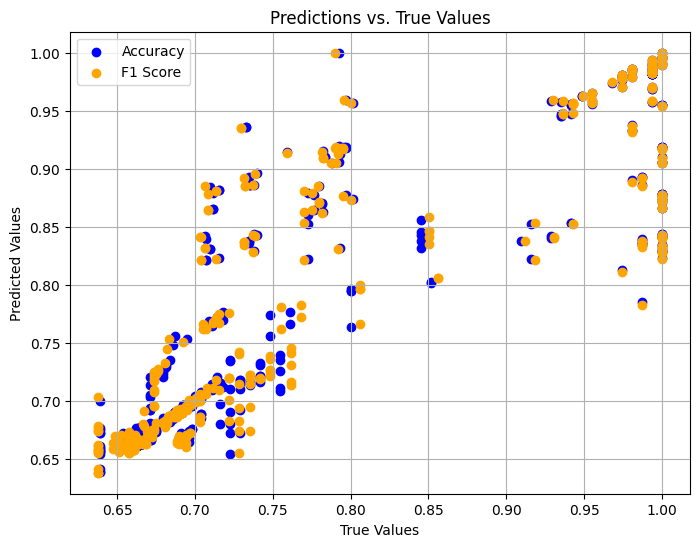

In [11]:
import matplotlib.pyplot as plt

# Scatter plot for Predictions vs. True Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test['Accuracy'], y_test_pred[:, 0], c='blue', marker='o', label='Accuracy')
plt.scatter(y_test['F1 Score'], y_test_pred[:, 1], c='orange', marker='o', label='F1 Score')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs. True Values')
plt.legend()
plt.grid(True)
plt.show()


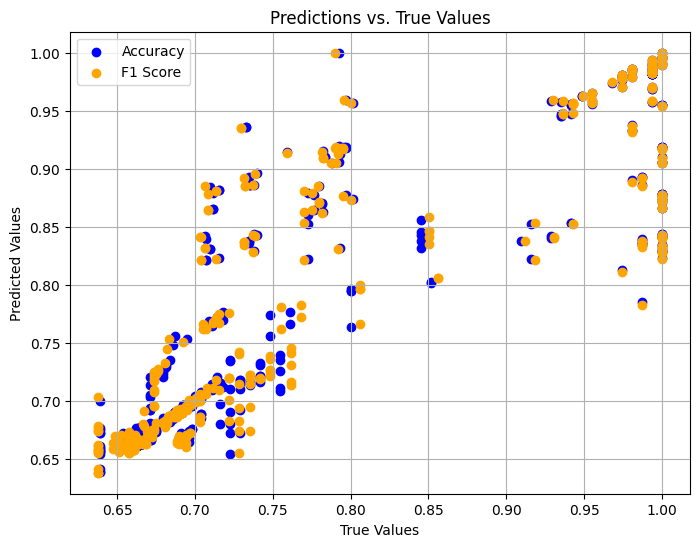

In [13]:
import matplotlib.pyplot as plt

# Scatter plot for Predictions vs. True Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test['Accuracy'], y_test_pred[:, 0], c='blue', marker='o', label='Accuracy')
plt.scatter(y_test['F1 Score'], y_test_pred[:, 1], c='orange', marker='o', label='F1 Score')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs. True Values')
plt.legend()
plt.grid(True)
plt.show()
